# Studying Computer Vision
A lot of the texts here are from wikipedia!

In [1]:
# do all the import stuff
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image
from scipy import signal
import numpy as np

# import my modules
import sys
sys.path.append('/home/julian/dev/computer_vision_ws2015/')

import juvis as jv

## positive definite

$ M^{n \times n} \in {\rm I\!R} $ is said to be positive definite if the scalar $ z^TMz > 0,  \forall z \in {\rm I\!R}^{n \times 1}\setminus\{0\}$

A quadratic real function $f(z)$ with $n$ real variables $z_1, ..., z_n$ can always be written as $z^TMz$ where $z$ is the column vector with the variables and $M$ is a symmetric real matrix. Therefore, the matrix being positive definite means that $f$ has a unique minimum (zero) where $z$ is zero and is strictly postivie for any other $z$


In [ ]:
M = np.array([[1, 0], [0, 1]])
M2 = np.array([[1, -2], [3, -4]])

jv.paint_mats([M, M2], interpolation="nearest", vmin=-4, vmax=4)
#jv.plot2d(M)

In [ ]:
z = np.array([-1, -1])
x = np.dot(np.dot(z.T, M), z)
print("M:" + str(x))  # positive definite

x2 = np.dot(np.dot(z.T, M2), z)
print("M2:" + str(x2))  # not positive definite!

## Image gradient

The image gradient defines the directional change in intensity in an image. It is given by the formula $\nabla f = \begin{pmatrix}g_x\\g_y\end{pmatrix} = \begin{pmatrix}\frac{\delta f}{\delta x}\\\frac{\delta f}{\delta y}\end{pmatrix} $ where $\frac{\delta f}{\delta x}$ is the gradient in x direction and $\frac{\delta f}{\delta y}$ is the gradient in y direction.

The *gradient direction* can be calculated by the formula: $\theta = atan2(g_x, g_y)$

### atan2

atan2 is the arctangent function with two arguments. For any real number $x$ and $y$ where $x, y \neq 0$, $atan2(x,y)$ is the angle in radians between the positive $x$-axis of a plane and the point given by the coords $(x,y)$. The angle is positive for conter-clockwise angles (upper half-plane) and negative for clockwise angles (lower half-plane).

In [ ]:
X = np.array([
    [1,1,2],
    [1,1,0]])
Y = np.array([
    [0,0,1],
    [1,1,2]])

Theta = np.arctan2(X, Y)
print("Theta:")
print(Theta)

jv.paint_mats([X, Y, Theta], interpolation="nearest", vmin=0, vmax=2)

jv.plot_vec(X, Y)

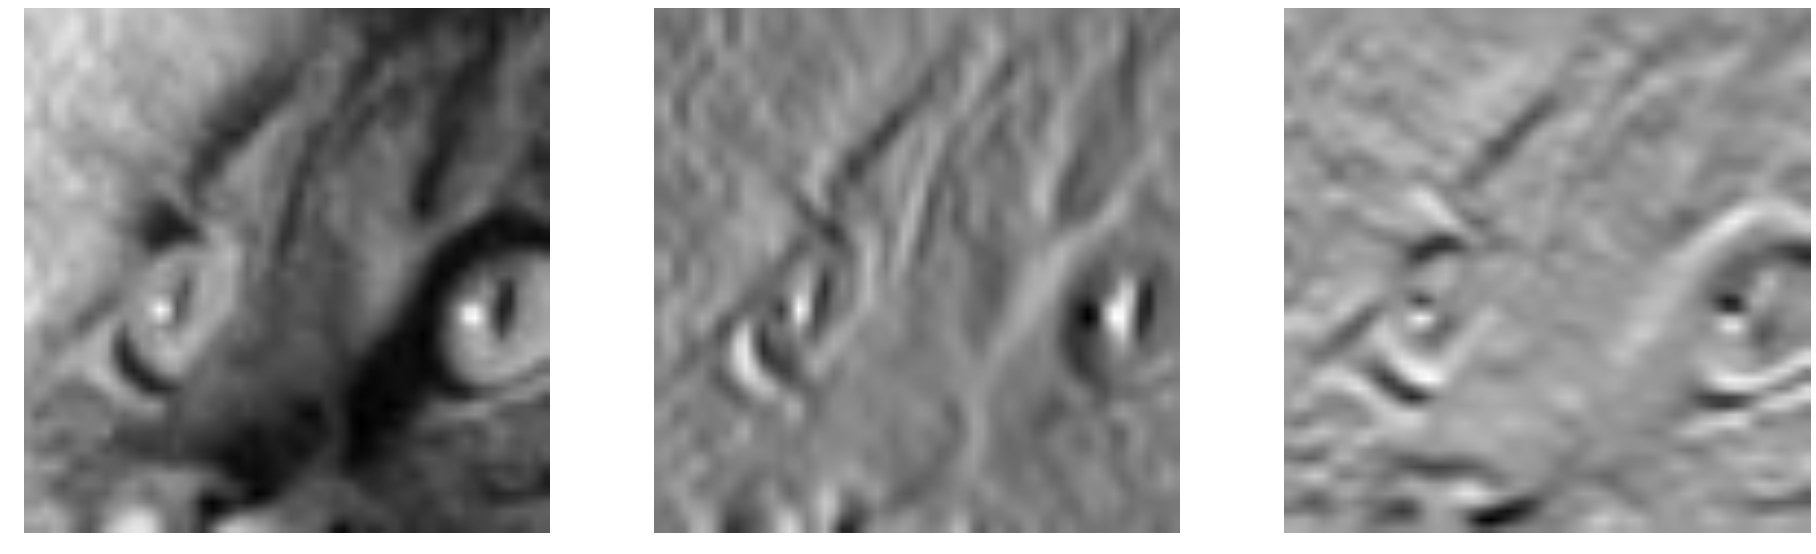

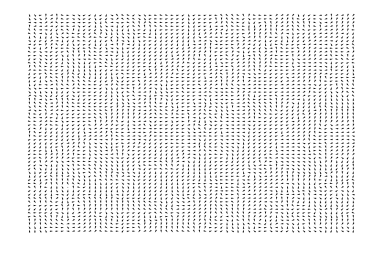

In [7]:
A = np.array(Image.open('smila.png').convert('L'))

A = A[270:310,270:330]


Kx = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
Ky = Kx.T

Sx = signal.convolve2d(A, Kx, boundary='symm', mode='same')
Sy = signal.convolve2d(A, Ky, boundary='symm', mode='same')


jv.paint_mats([A, Sx, Sy])
jv.plot_vec(Sx, Sy)